# CP 2

# Downloading data

## load drive

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
%cd drive/'MyDrive'/twitter/

/content/drive/MyDrive/twitter


## download followers ID

> this work has done on Terminal & R 




In [1]:
# on Terminal, didn't include API token here; User name is JakeLobin, for instance

### twarc (v1) 
# twarc followers JakeLobin > JakeLobin.txt --profile Yujin_Irene_Kim

### twarc2 (v2)

# twarc2 configure
# twarc2 followers "JakeLobin" JakeLobin.jsonl
# twarc2 csv --input-users-columns --no-input-tweet-columns JakeLobin.jsonl JakeLobin.csv
# twarc2 flatten JakeLobin.jsonl JakeLobin.jsonl



In [ ]:
# on R

# library(rtweet)
# library(tidyverse)
# library(openxlsx)

# # on Twitter App, set callback url as http://127.0.0.1:1410
# token <- create_token(app = "rtweet_tokens", #whatever you named your app
#                consumer_key = "xxxx",
#                consumer_secret = "xxxx")

# # load the list
# user_list <- read.xlsx("/Users/yujinkim/Downloads/Tweeter_ideology/dataverse_files/replicate2/TwitterPoliticalList_2.6.21.xlsx")

# # set a folder for downloaded files
# outfolder <- '~/Downloads/Tweeter_ideology/dataverse_files/elites_list'
# accounts.done <- gsub(".rds", "", list.files(outfolder))

# # repeat this when downloading connection fails

# user_list <- user_list[!user_list$user_name %in% accounts.done, ]
# accounts.left <- unlist(user_list$user_name)


# for (i in 1:length(accounts.left)) {
#     temp <- get_followers(
#       accounts.left[i], retryonratelimit = TRUE, token = token)
#     saveRDS(temp, paste0(outfolder, i, ".rds"))
#     cat(i, "of", length(accounts.left), "\n")
# }



In [4]:
import pandas as pd

account_list = pd.read_excel('current_file_st2_updated.xlsx')

In [5]:
account_list

,Unnamed: 0,ids,user_name,type,Handle,id,followers_new,followers_080521,followers_aug2021,save_bl,change,re_download,class,loss
0,NaN,537,RepTrey,legislator,@RepTrey,8.119863e+17,11305.0,12755,13412,UPDATED,-4.898598,False,old,17.052136
1,NaN,212,RepArrington,legislator,@RepArrington,8.162847e+17,16273.0,18314,19261,UPDATED,-4.916671,False,old,16.719450
2,NaN,534,RepTomSuozzi,legislator,@RepTomSuozzi,8.167054e+17,14457.0,16260,17083,UPDATED,-4.817655,False,old,16.635916
3,NaN,258,RepChrisPappas,legislator,@RepChrisPappas,1.067749e+18,12068.0,13556,14242,UPDATED,-4.816739,False,old,16.465034
4,NaN,337,RepGregStanton,legislator,@RepGregStanton,1.080885e+18,9255.0,10378,10904,UPDATED,-4.823918,False,old,16.236269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,NaN,77,NPR,media,@NPR,5.392522e+06,9098200.0,8725362,8855356,EXISTING,-1.467970,False,neg,-6.409556
641,NaN,75,FoxNews,media,@FoxNews,1.367531e+06,21004102.0,20140277,20864402,EXISTING,-3.470624,False,neg,-6.433566
642,NaN,599,SenDuckworth,legislator,@SenDuckworth,1.058520e+09,796728.0,762398,775815,EXISTING,-1.729407,False,neg,-6.754346
643,NaN,173,MarshaBlackburn,legislator,@MarshaBlackburn,2.781456e+08,343015.0,327628,340247,EXISTING,-3.708776,False,neg,-7.044880


## measuring political ideology 



> 아래의 논문 및 저자의 코드 이용 (참조: https://journals.sagepub.com/doi/suppl/10.1177/0956797615594620), estimating ideology has also done on R separately

> Barberá, P., Jost, J. T., Nagler, J., Tucker, J. A., & Bonneau, R. (2015). Tweeting from left to right: Is online political communication more than an echo chamber?. Psychological science, 26(10), 1531-1542.




In [4]:
# after measuring ideology, create 3 categories of liberal, conservative, and independent groups.
import pandas as pd

estimates = pd.read_excel('./data/estimates.xlsx')

In [5]:
estimates['author.id'] = estimates['author.id'].astype('int64')


In [6]:
estimates.sample(10)

,ideology,type,sum,author.id,tert
115380,-0.403656,Ordinary\nusers,6,452839911,independent
215331,0.364539,Ordinary\nusers,231,782548697179643904,independent
157049,-0.081455,Ordinary\nusers,1,1681261890,independent
107777,-0.467577,Ordinary\nusers,24,381582213,liberal
151551,-0.122743,Ordinary\nusers,4,1431481278,independent
239739,0.567439,Ordinary\nusers,285,934869947104165760,conservative
307342,1.387406,Ordinary\nusers,7,1315954644582125568,conservative
62532,-0.899623,Ordinary\nusers,43,113286228,liberal
251292,0.672217,Ordinary\nusers,34,1017533342546157568,conservative
98930,-0.542833,Ordinary\nusers,2,317617991,liberal


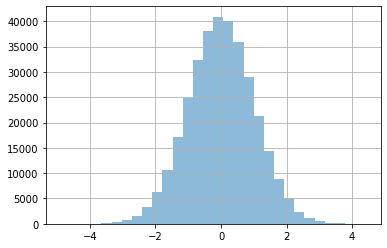

In [9]:

ax = estimates.ideology.hist(bins=30, alpha=0.5)

## download tweets (by 3 topics)

In [ ]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

In [ ]:
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAJgGNwEAAAAA5TJiVK%2B3n7WcG%2FHlcCEe%2FLb8YVQ%3DSBfIHOnhLQeVRLbquGE8PTjDIrebo00HShbytiNm1cC2FlyNAo'

def auth():
    return os.getenv('TOKEN')

In [ ]:
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [ ]:
def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id,referenced_tweets.id,attachments.media_keys',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,location,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type,contained_within',
                    'media.fields': 'url,preview_image_url',
                    'next_token': {}}
    return (search_url, query_params)




In [ ]:
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


In [ ]:
url = create_url(keyword, start_time,end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])
#print(json.dumps(json_response, indent=4, sort_keys=True))

In [ ]:
def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open("tweets_" + fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
            
        # referenced_tweets
        if ('referenced_tweets' in tweet):
            referenced_tweets_id = tweet['referenced_tweets'][0]['id']
            referenced_tweets_type = tweet['referenced_tweets'][0]['type']
        else:
            referenced_tweets_id = " "
            referenced_tweets_type = " "
            
        # 4. Tweet ID
        tweet_id = tweet['id']

        # 5. Language
        lang = tweet['lang']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 7. source
        source = tweet['source']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, referenced_tweets_id, referenced_tweets_type, like_count, quote_count, reply_count, retweet_count, source, text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 

In [ ]:
# no column ids
def includes_append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open("includes_" + fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['includes']['tweets']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

#         # 0. Converstation ID
#         conversation_id = tweet['conversation_id']
        
        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "

        # 4. Tweet ID
        tweet_id = tweet['id']

        # 5. Language
        lang = tweet['lang']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 7. source
        reply_settings = tweet['reply_settings']
        
        # 7. source
        source = tweet['source']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, reply_settings, like_count, quote_count, reply_count, retweet_count, source, text]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Includes added from this response: ", counter) 

In [ ]:
# no column ids
def users_append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open("users_" + fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['includes']['users']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

#         # 0. Converstation ID
#         conversation_id = tweet['conversation_id']
        
#         # 1. Author ID
#         author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
        # 4. description
        description = tweet['description']

        # 4. location
        # 3. Geolocation
        if ('location' in tweet):   
            location = tweet['location']
        else:
            location = " "
        
        # 4. Tweet ID
        tweet_id = tweet['id']

        # name
        name = tweet['name']

        # username
        username = tweet['username']

        
        # 6. Tweet metrics
        followers_count = tweet['public_metrics']['followers_count']
        following_count = tweet['public_metrics']['following_count']
        listed_count = tweet['public_metrics']['listed_count']
        tweet_count = tweet['public_metrics']['tweet_count']

#         # 7. source
#         source = tweet['source']

        # verified
        verified = tweet['verified']
        
        # Assemble all data in a list
        res = [created_at, description, geo, location, tweet_id, name, username, followers_count, following_count, listed_count, tweet_count]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Users added from this response: ", counter)
    

In [ ]:
#Inputs for tweets 2021-03-29T00:00:00.000

bearer_token = auth()
headers = create_headers(bearer_token)
#keyword = 'Delta WHO OR Delta Fauci OR Delta mask OR Delta lockdown OR Delta cases OR Delta CDC OR #DeltaVariant OR Delta variant OR Delta Corona OR Delta Covid OR Delta pandemic OR Delta virus OR Delta vaccine OR Delta #coronavirus OR Delta #covid19 OR Delta #quarantine OR Delta #pandemic OR Delta #socialdistancing OR Delta #staysafe OR Delta #StayHome OR Delta #virus OR Delta #coronavirusoutbreak OR Delta #COVID19Pandemic OR Delta #reopenamerica OR Delta #coronahoax OR Delta #vaccination OR Delta #FullyVaccinated OR Delta #vaccinated OR Delta #VaccinesSaveLives OR Delta #MaskUp -plane -flight -airline has:geo lang:en place_country:US has:links'
# # period 1
# start_list =    ['2021-06-22T00:00:00.000Z']
# end_list =      ['2021-06-23T00:00:00.000Z']
# # period 2
# start_list =    ['2021-06-26T00:00:00.000Z']
# end_list =      ['2021-06-27T00:00:00.000Z']

#keyword ='Britney Spears OR Britney conservatorship OR #BelieveBritney OR #FreeBritney OR #JusticeforBritney OR #FreeBritneyNow OR #BritneySpears has:geo lang:en place_country:US has:links'
keyword ='Britney Spears OR #FreeBritney lang:en place_country:US has:links'

# start_list =    ['2021-06-23T00:00:00.000Z']
# end_list =      ['2021-06-24T00:00:00.000Z']

# keyword = 'Biden Putin OR Geneva Summit OR Biden Summit OR Biden Geneva OR Putin Summit OR Putin Geneva OR #BidenPutin OR #BidenPutinSummit OR #GenevaSummit OR #genevaSummit2021 has:geo lang:en place_country:US has:links'
# start_list =    ['2021-06-16T00:00:00.000Z']
# end_list =      ['2021-06-17T00:00:00.000Z']


max_results = 10
# max_results = 500

#Total number of tweets we collected from the loop
total_tweets = 0

glob_file_name = "data.csv"

# Create file for tweets
csvFile1 = open("tweets_" + glob_file_name, "a", newline="", encoding='utf-8')
csvWriter1 = csv.writer(csvFile1)

# Create file for includes
csvFile2 = open("includes_" + glob_file_name, "a", newline="", encoding='utf-8')
csvWriter2 = csv.writer(csvFile2)

# Create file for users
csvFile3 = open("users_" + glob_file_name, "a", newline="", encoding='utf-8')
csvWriter3 = csv.writer(csvFile3)

#Create headers for tweets
csvWriter1.writerow(['author id', 'created_at', 'geo', 'tweet_id','lang', 'referenced_tweets_id', 'referenced_tweets_type', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet'])
csvFile1.close()

#Create headers for includes
csvWriter2.writerow(['author_id', 'created_at', 'geo', 'tweet_id', 'lang', 'reply_settings', 'like_count', 'quote_count', 'reply_count', 'retweet_count', 'source', 'tweet'])
csvFile2.close()

#Create headers for users
csvWriter3.writerow(['created_at', 'description','geo', 'location', 'tweet_id', 'name', 'username', 'followers_count', 'following_count', 'listed_count', 'tweet_count'])
csvFile3.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 100 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, glob_file_name)
                includes_append_to_csv(json_response, glob_file_name)
                users_append_to_csv(json_response, glob_file_name)
                
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, glob_file_name)
                includes_append_to_csv(json_response, glob_file_name)
                users_append_to_csv(json_response, glob_file_name)

                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        time.sleep(5)
print("Total number of results: ", total_tweets)

# Pre-processing

## URL pre-processed & extraction (3 topics) -- politics as example

### URL expander

In [ ]:
df = pd.read_excel("temp_biden_putin_entity_url_check.xlsx")

df_urls = df['entity_url'].values

In [ ]:
df_urls_check = []

for i in df_urls:
    try:
        i = urllib2.urlopen(i)
        i = i.geturl()
        df_urls_check.append(i)
    except:
        df_urls_check.append("error2")

In [ ]:
df_urls_check_df = pd.DataFrame({'url2':df_urls_check})
df_urls_check_done = pd.concat([df, df_urls_check_df], axis=1)
df_urls_check_done.to_csv('temp_biden_putin_entity_url_check_2nd.csv', )


### cleaning URL

In [ ]:
import re

biden_putin_en = pd.read_csv("./topics/biden_putin_en.csv", low_memory=False)
biden_putin_en_copy = biden_putin_en.copy()
biden_putin_en_copy = biden_putin_en_copy[['Unnamed: 0','id', 'author.id', 'text', 'entities.urls']]
biden_putin_en_copy.rename(columns={'entities.urls':"entities_urls"},inplace=True)

biden_putin_en_copy['text_url'] = [re.findall(r'(https?://[^\s]+)', l) for l in biden_putin_en_copy.text.values ]

biden_putin_en_copy['entity_url'] = [re.findall(r'"expanded_url": "(https?://[^\s]+)"', l) for l in  biden_putin_en_copy.entities_urls.values.astype(str)] 


In [ ]:
biden_putin_en_copy.to_csv("biden_putin_en_copy.csv")


### merging URL

In [ ]:
# politics as an example
import pandas as pd

biden_putin_en = pd.read_csv("biden_putin_en.csv", low_memory=False)

In [ ]:
import pandas as pd

#biden_putin_text_url = pd.read_csv("biden_putin_text_url.csv", low_memory=False)
biden_putin_entity_url = pd.read_excel("temp_biden_putin_entity_url_updated.xlsx")


In [ ]:
biden_putin_en_copy = pd.read_csv("biden_putin_en_copy.csv", low_memory=False)

In [ ]:
biden_putin_en_copy_st = biden_putin_en_copy[['id','author.id','text_url','entity_url']].copy()

In [ ]:
biden_putin_en_copy_st['entity_url_count'] = biden_putin_en_copy_st.entity_url.str.count(r'(https?://[^\s]+)') 

In [ ]:
biden_putin_en_copy_st["entity_url"] = biden_putin_en_copy_st["entity_url"].str.replace("\[", "")
biden_putin_en_copy_st["entity_url"] = biden_putin_en_copy_st["entity_url"].str.replace("\]", "")
biden_putin_en_copy_st["entity_url"] = biden_putin_en_copy_st["entity_url"].str.replace("\'", "")


In [ ]:
test = pd.concat([biden_putin_en_copy_st, biden_putin_en_copy_st['entity_url'].str.split(', ', expand=True)], axis=1)
test.rename(columns={0: 'e1', 1: 'e2', 2: 'e3', 3: 'e4', 4: 'e5', 5: 'e6', 6: 'e7', 7: 'e8', 8: 'e9'}, inplace=True)
test = test.drop(columns = ['text_url', 'entity_url'])


In [ ]:
temp = pd.merge(test, biden_putin_entity_url[['entity_url','fc']], left_on='e1', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e1e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp = pd.merge(temp, biden_putin_entity_url[['entity_url','fc']], left_on='e2', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e2e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp = pd.merge(temp, biden_putin_entity_url[['entity_url','fc']], left_on='e3', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e3e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp = pd.merge(temp, biden_putin_entity_url[['entity_url','fc']], left_on='e4', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e4e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp = pd.merge(temp, biden_putin_entity_url[['entity_url','fc']], left_on='e5', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e5e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp = pd.merge(temp, biden_putin_entity_url[['entity_url','fc']], left_on='e6', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e6e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp = pd.merge(temp, biden_putin_entity_url[['entity_url','fc']], left_on='e7', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e7e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp = pd.merge(temp, biden_putin_entity_url[['entity_url','fc']], left_on='e8', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e8e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp = pd.merge(temp, biden_putin_entity_url[['entity_url','fc']], left_on='e9', right_on='entity_url', how='left')
temp.rename(columns={'fc': 'e9e'}, inplace=True)
temp = temp.drop(columns = ['entity_url'])
temp.shape


In [ ]:
temp.to_csv("biden_putin_en_links_vars_fc.csv")

In [ ]:
biden_putin_links = pd.read_csv("biden_putin_en_links_vars_fc.csv", low_memory=False)

In [ ]:
# reference id
biden_putin_en_retweet = biden_putin_en[['id', 'author.id','referenced_tweets']]

In [ ]:
import re


def match_id(s):
    m = re.search(r'([0-9]+)', s)
    return str(m[1]) if m else None

biden_putin_en_retweet['id_referenced_tweets'] = biden_putin_en_retweet['referenced_tweets'].astype(str).apply(match_id)


In [ ]:
biden_putin_en_retweet_filter = biden_putin_en_retweet.drop(columns = ['referenced_tweets'])

biden_putin_en_retweet_filter = biden_putin_en_retweet_filter[biden_putin_en_retweet_filter['id_referenced_tweets'].notnull()]

biden_putin_en_retweet_filter.isnull().sum()



In [ ]:
biden_putin_links['id_referenced_tweets'] = biden_putin_links['id'].astype(str)

#covid19_links['id_original'] = covid19_links['id'].astype(str)

biden_putin_links = biden_putin_links.drop(columns = ['id', 'author.id','Unnamed: 0', 'entity_url_count'])

temp = pd.merge(biden_putin_en_retweet_filter, biden_putin_links, on = ['id_referenced_tweets'],  how='left')
# temp.rename(columns={'text_url_expand': 't3e'}, inplace=True)
# temp = temp.drop(columns = ['text_url'])
# temp.shape
temp


In [ ]:
len(biden_putin_en['id'])

In [ ]:
temp.to_csv("biden_putin_retweet_links_fc.csv")

# Estimate & Analysis

## merging estimates (political ideology) to URLs


In [10]:
import pandas as pd

all_topics = pd.read_excel('./data/topics_all.xlsx')

In [26]:
all_topics.sample(10)

,id,author.id,ideology,urls,urls_rep,tert,topic
261304,1407827145246724096,21715782,-1.636893,https://philstarlife.com/geeky/340848-britney-...,https://philstarlife.com/geeky/340848-britney-...,liberal,entertainment
524167,1406507357794803712,1244524520020430848,1.078732,https://twitter.com/China2ASEAN/status/1406507...,https://twitter.com/China2ASEAN/status/1406507...,conservative,health
209672,1407847469782867968,889163762846093312,0.512142,https://twitter.com/PopCrave/status/1407841751...,https://twitter.com/PopCrave/status/1407841751...,conservative,entertainment
423636,1406641130607763456,949607029060104192,0.586181,https://www.businessinsider.com/covid-19-survi...,https://www.businessinsider.com/covid-19-survi...,conservative,health
64075,1405231893637894144,863501377,-0.233241,https://twitter.com/dougmillsnyt/status/140522...,https://twitter.com/dougmillsnyt/status/140522...,independent,politics
580093,1406407793779691520,1396543942506606592,2.328232,https://twitter.com/trevortombe/status/1406399...,https://twitter.com/trevortombe/status/1406399...,conservative,health
165722,1405134952686030848,1129010329164423168,0.830993,https://twitter.com/Doranimated/status/1404824...,https://twitter.com/Doranimated/status/1404824...,conservative,politics
497828,1406548342792867840,733552389005795328,0.309791,https://milaap.org/fundraisers/support-rubina-...,https://milaap.org/fundraisers/support-rubina-...,independent,health
151281,1405151959984885760,718690670,-0.275294,https://twitter.com/JuliaDavisNews/status/1405...,https://twitter.com/JuliaDavisNews/status/1405...,independent,politics
240852,1407834247168237568,71863852,-1.036771,https://twitter.com/BritneyLawArmy/status/1407...,https://twitter.com/BritneyLawArmy/status/1407...,liberal,entertainment


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd415c99750>,
      dtype=object)

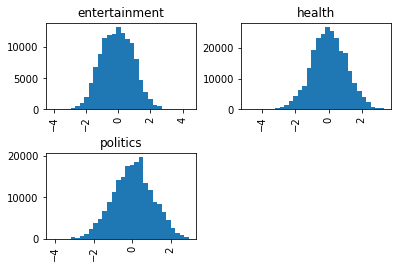

In [14]:

all_topics['ideology'].hist(by=all_topics['topic'], bins = 30)


In [3]:
# politics (Biden-Putin Genenva Summit)
import pandas as pd

politics = pd.read_excel('./topics/biden_putin_df_diversity.xlsx')

In [4]:
len(politics)

22022

In [5]:
politics.sample(3)

,urls_rep,conservative,liberal,independent,SIMPSON,mean,sd,count
20971,https://www.westernjournal.com/agitated-biden-...,1,1,2,0.625,0.047675,1.130728,4
9941,https://twitter.com/JohnRossomando/status/1405...,2,0,0,0.000,1.651385,0.000000,2
4578,https://twitter.com/9bb2e5c43a21469/status/140...,0,0,9,0.000,0.088599,0.000000,9


In [6]:
politics['topic'] = 'politics'

In [7]:
# entertainment (free Britney)

entertainment = pd.read_excel('./topics/britney_df_diversity.xlsx')

In [8]:
entertainment.sample(3)

,urls_rep,independent,conservative,liberal,SIMPSON,mean,sd,count
8972,https://www.dhakatribune.com/showtime/2021/06/...,1,0,0,0.0,-0.264030,NaN,1
3426,https://twitter.com/emmamurphyitv/status/14078...,0,0,2,0.0,-1.092445,0.073258,2
9560,https://www.nlg.org/nlg-review/article/choice-...,0,0,1,0.0,-1.419643,NaN,1


In [9]:
entertainment['topic'] = 'entertainment'

In [10]:
# health (COVID-19)

health = pd.read_excel('./topics/covid19_df_diversity.xlsx')

In [11]:
health.sample(3)

,urls_rep,liberal,independent,conservative,SIMPSON,mean,sd,count
518,http://viableopposition.blogspot.com/2021/06/v...,4,0,0,0.0,-0.582567,0.0,4
9855,https://thekabultimes.gov.af/2021/06/ministry-...,0,1,0,0.0,0.126324,NaN,1
23405,https://twitter.com/KanezaDiane/status/1406699...,0,1,0,0.0,0.012782,NaN,1


In [12]:
health['topic'] = 'health'

In [13]:
topics = pd.concat([politics, health, entertainment], ignore_index=True)

In [14]:
topics.sample(10)

,urls_rep,conservative,liberal,independent,SIMPSON,mean,sd,count,topic
36532,https://twitter.com/careintuk/status/140660918...,1,1,0,0.500000,0.618064,3.244136,2,health
9507,https://twitter.com/JAMES00117053/status/14051...,2,0,0,0.000000,1.188503,0.547409,2,politics
68510,https://www.nsw.gov.au/covid-19/stay-safe/rule...,0,1,0,0.000000,-0.783970,NaN,1,health
42811,https://twitter.com/hcphtx/status/140636499286...,0,1,0,0.000000,-0.664000,NaN,1,health
39927,https://twitter.com/DrLiMengYAN1/status/140662...,0,1,0,0.000000,-0.836872,NaN,1,health
56107,https://twitter.com/thehill/status/14063221651...,10,9,8,0.663923,0.052104,1.284264,27,health
52880,https://twitter.com/rishibagree/status/1405359...,1,1,0,0.500000,0.636828,2.055656,2,health
7495,https://twitter.com/DianaCialino/status/140517...,0,1,1,0.500000,-0.423271,0.092177,2,politics
26179,https://flipboard.com/@geowarner/-opinion-reme...,0,1,0,0.000000,-1.643271,NaN,1,health
46089,https://twitter.com/Kunal97573639/status/14065...,1,0,0,0.000000,1.840652,NaN,1,health


## classifying news source



In [22]:
# conservative source: Fox (fox), Washington Times (washingtontimes), NY Post (nypost), Wall Street Journal (wsj)
# liberal source: New York Times (nyt), Washington Post (washingtonpost), Huffington Post (huffpost), LA Times (latimes), CNN (cnn),
# other source: the Guardian (guardian), Reuter (reuter), USA Today (usatoday), Forbes (forbes), ABC (abc), the Hill (thehill), BBC (bbc), Economist (economist) 


In [15]:
cons_source = ['fox', 'washingtontimes', 'nypost', 'wsj']
lib_source = ['nyt', 'washingtonpost', 'huffpost', 'latimes', 'cnn']
other_source = ['reuter', 'usatoday',  'abc' ,'thehill', 'bbc' ]

In [16]:
topics['cons_source_match'] = topics['urls_rep'].apply(lambda x: [i for i in cons_source if i in x])
topics['lib_source_match'] = topics['urls_rep'].apply(lambda x: [i for i in lib_source if i in x])
topics['other_source_match'] = topics['urls_rep'].apply(lambda x: [i for i in other_source if i in x])


In [17]:
import numpy as np

topics['source_bi'] = np.where( (topics['cons_source_match'].str.len() >= 1), 'conservative',
        np.where((topics['lib_source_match'].str.len() >= 1), 'liberal',
        np.where((topics['other_source_match'].str.len() >= 1), 'others', 'NA')))


In [18]:
# no twitter.com account and extract source labels

topics_nt = topics [ (topics['urls_rep'].str.contains("twitter.com") == False) & (topics['source_bi'] != 'NA' ) & (topics['source_bi'] != 'others' ) ]

In [19]:
len(topics_nt)

1692

In [20]:
topics_nt.sample(10)

,urls_rep,conservative,liberal,independent,SIMPSON,mean,sd,count,topic,cons_source_match,lib_source_match,other_source_match,source_bi
29367,https://nypost.com/2021/06/18/nyc-celebrates-a...,1,0,0,0.000000,1.252492,NaN,1,health,[nypost],[],[],conservative
830,https://amp.cnn.com/cnn/2021/06/16/politics/av...,0,1,1,0.500000,-0.610824,0.525282,2,politics,[],[cnn],[],liberal
18353,https://www.foxnews.com/media/mcmaster-biden-p...,1,6,0,0.244898,-0.550010,0.808441,7,politics,[fox],[],[],conservative
68550,https://www.nytimes.com/2020/04/14/us/bishop-g...,1,0,1,0.500000,0.744689,0.851980,2,health,[],[nyt],[],liberal
19606,https://www.nytimes.com/2021/06/15/world/asia/...,1,0,1,0.500000,0.287367,0.397074,2,politics,[],[nyt],[],liberal
19850,https://www.powerlineblog.com/archives/2021/06...,1,0,0,0.000000,0.770011,NaN,1,politics,[],[cnn],[],liberal
18359,https://www.foxnews.com/media/reporters-agitat...,3,4,8,0.604444,-0.078419,0.692632,15,politics,[fox],[],[],conservative
1702,https://fox8.com/news/face-to-face-biden-putin...,0,1,1,0.500000,-1.224243,1.147626,2,politics,[fox],[],[],conservative
18322,https://www.fox9.com/news/biden-putin-summit-l...,0,1,0,0.000000,-2.601523,NaN,1,politics,[fox],[],[],conservative
68637,https://www.nytimes.com/2021/06/19/world/us-ta...,16,14,16,0.665406,0.188801,0.899853,46,health,[],[nyt],[],liberal


In [21]:
topics_table  = topics_nt.groupby(['topic', 'source_bi'])['conservative', 'liberal' ,'independent'].sum().reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [22]:
topics_table

,topic,source_bi,conservative,liberal,independent
0,entertainment,conservative,97,286,97
1,entertainment,liberal,2808,4180,3076
2,health,conservative,740,647,546
3,health,liberal,1211,1633,1208
4,politics,conservative,2001,1624,1820
5,politics,liberal,4952,5448,5297


In [72]:
topics_table.T

,0,1,2,3,4,5
topic,entertainment,entertainment,health,health,politics,politics
source_bi,conservative,liberal,conservative,liberal,conservative,liberal
conservative,97,2808,740,1211,2001,4952
liberal,286,4180,647,1633,1624,5448
independent,97,3076,546,1208,1820,5297


In [23]:
topics_nt50 = topics_nt[topics_nt['count'] >= 50]

In [24]:
topics_nt50_table  = topics_nt50.groupby(['topic', 'source_bi'])['conservative', 'liberal' ,'independent'].sum().reset_index()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [25]:
topics_nt50_table

,topic,source_bi,conservative,liberal,independent
0,entertainment,conservative,45,140,47
1,entertainment,liberal,2712,4028,2986
2,health,conservative,359,217,270
3,health,liberal,671,795,670
4,politics,conservative,1555,1094,1417
5,politics,liberal,4266,4408,4651


## statistic test

In [56]:
from scipy.stats import chi2_contingency
from itertools import combinations
from statsmodels.sandbox.stats.multicomp import multipletests

def get_asterisks_for_pval(p_val):
    """Receives the p-value and returns asterisks string."""
    if p_val > 0.05:
        p_text = "ns"  # above threshold => not significant
    elif p_val < 1e-4:  
        p_text = '****'
    elif p_val < 1e-3:
        p_text = '***'
    elif p_val < 1e-2:
        p_text = '**'
    else:
        p_text = '*'
    
    return p_text

In [42]:
def chisq_and_posthoc_corrected(df):
    """Receives a dataframe and performs chi2 test and then post hoc.
    Prints the p-values and corrected p-values (after FDR correction)"""
    # start by running chi2 test on the matrix
    chi2, p, dof, ex = chi2_contingency(df, correction=True)
    print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
    
    # post-hoc
    all_combinations = list(combinations(df.index, 2))  # gathering all combinations for post-hoc chi2
    p_vals = []
    print("Significance results:")
    for comb in all_combinations:
        new_df = df[(df.index == comb[0]) | (df.index == comb[1])]
        chi2, p, dof, ex = chi2_contingency(new_df, correction=True)
        p_vals.append(p)
        # print(f"For {comb}: {p}")  # uncorrected

    # checking significance
    # correction for multiple testing
    reject_list, corrected_p_vals = multipletests(p_vals, method='fdr_bh')[:2]
    for p_val, corr_p_val, reject, comb in zip(p_vals, corrected_p_vals, reject_list, all_combinations):
        print(f"{comb}: p_value: {p_val:5f}; corrected: {corr_p_val:5f} ({get_asterisks_for_pval(p_val)}) reject: {reject}")

In [65]:
topics_table_politics = topics_table[topics_table['topic']=='politics']
politics_df = topics_table_politics.drop('topic', axis=1, inplace=False)
politics_df.set_index('source_bi', inplace=True)

#politics_df = pd.DataFrame(topics_table_politics, columns=[ "conservative", "liberal", "independent"])

chi2, p, dof, ex = chi2_contingency(politics_df.T, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
print('p-value is less than 0.05 =', p < 0.05)

Chi2 result of the contingency table: 62.188166344904765, p-value: 3.133366950597085e-14
p-value is less than 0.05 = True


In [66]:
politics_df = politics_df.T
politics_df

source_bi,conservative,liberal
conservative,2001,4952
liberal,1624,5448
independent,1820,5297


In [68]:
politics_df['conservative_perc'] = round( (politics_df['conservative'] / ( politics_df['conservative'] + politics_df['liberal']))* 100, 2)
politics_df['liberal_perc'] = round( (politics_df['liberal'] / ( politics_df['conservative'] + politics_df['liberal']))* 100, 2)

In [69]:
politics_df

source_bi,conservative,liberal,conservative_perc,liberal_perc
conservative,2001,4952,28.78,71.22
liberal,1624,5448,22.96,77.04
independent,1820,5297,25.57,74.43


In [57]:
chisq_and_posthoc_corrected(politics_df)

Chi2 result of the contingency table: 62.188166344904765, p-value: 3.133366950597085e-14
Significance results:
('conservative', 'liberal'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('conservative', 'independent'): p_value: 0.000021; corrected: 0.000031 (****) reject: True
('liberal', 'independent'): p_value: 0.000313; corrected: 0.000313 (***) reject: True


In [58]:
topics_table_politics = topics_table[topics_table['topic']=='entertainment']
entertainment_df = topics_table_politics.drop('topic', axis=1, inplace=False)
entertainment_df.set_index('source_bi', inplace=True)

chi2, p, dof, ex = chi2_contingency(entertainment_df.T, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
print('p-value is less than 0.05 =', p < 0.05)

Chi2 result of the contingency table: 61.40719638942441, p-value: 4.630167790102384e-14
p-value is less than 0.05 = True


In [59]:
entertainment_df = entertainment_df.T
entertainment_df

source_bi,conservative,liberal
conservative,97,2808
liberal,286,4180
independent,97,3076


In [70]:
entertainment_df['conservative_perc'] = round( (entertainment_df['conservative'] / ( entertainment_df['conservative'] + entertainment_df['liberal']))* 100, 2)
entertainment_df['liberal_perc'] = round( (entertainment_df['liberal'] / ( entertainment_df['conservative'] + entertainment_df['liberal']))* 100, 2)
entertainment_df

source_bi,conservative,liberal,conservative_perc,liberal_perc
conservative,97,2808,3.34,96.66
liberal,286,4180,6.40,93.60
independent,97,3076,3.06,96.94


In [60]:
chisq_and_posthoc_corrected(entertainment_df)

Chi2 result of the contingency table: 61.40719638942441, p-value: 4.630167790102384e-14
Significance results:
('conservative', 'liberal'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('conservative', 'independent'): p_value: 0.581113; corrected: 0.581113 (ns) reject: False
('liberal', 'independent'): p_value: 0.000000; corrected: 0.000000 (****) reject: True


In [61]:
topics_table_politics = topics_table[topics_table['topic']=='health']
health_df = topics_table_politics.drop('topic', axis=1, inplace=False)
health_df.set_index('source_bi', inplace=True)

chi2, p, dof, ex = chi2_contingency(health_df.T, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
print('p-value is less than 0.05 =', p < 0.05)

Chi2 result of the contingency table: 45.419850395092375, p-value: 1.3715283917136505e-10
p-value is less than 0.05 = True


In [62]:
health_df = health_df.T
health_df

source_bi,conservative,liberal
conservative,740,1211
liberal,647,1633
independent,546,1208


In [63]:
chisq_and_posthoc_corrected(health_df)

Chi2 result of the contingency table: 45.419850395092375, p-value: 1.3715283917136505e-10
Significance results:
('conservative', 'liberal'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('conservative', 'independent'): p_value: 0.000017; corrected: 0.000025 (****) reject: True
('liberal', 'independent'): p_value: 0.062377; corrected: 0.062377 (ns) reject: False


In [71]:
health_df['conservative_perc'] = round( (health_df['conservative'] / ( health_df['conservative'] + health_df['liberal']))* 100, 2)
health_df['liberal_perc'] = round( (health_df['liberal'] / ( health_df['conservative'] + health_df['liberal']))* 100, 2)
health_df

source_bi,conservative,liberal,conservative_perc,liberal_perc
conservative,740,1211,37.93,62.07
liberal,647,1633,28.38,71.62
independent,546,1208,31.13,68.87


### URL shared more than 50 --  conservative case

In [64]:
### URL shared more than 50


topics_nt50_table_politics = topics_nt50_table[topics_nt50_table['topic']=='politics']
politics_df = topics_nt50_table_politics.drop('topic', axis=1, inplace=False)
politics_df.set_index('source_bi', inplace=True)

chi2, p, dof, ex = chi2_contingency(politics_df.T, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
print('p-value is less than 0.05 =', p < 0.05)

politics_df = politics_df.T

chisq_and_posthoc_corrected(politics_df)

Chi2 result of the contingency table: 73.65960943077324, p-value: 1.0116238100104127e-16
p-value is less than 0.05 = True
Chi2 result of the contingency table: 73.65960943077324, p-value: 1.0116238100104127e-16
Significance results:
('conservative', 'liberal'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('conservative', 'independent'): p_value: 0.000025; corrected: 0.000025 (****) reject: True
('liberal', 'independent'): p_value: 0.000007; corrected: 0.000010 (****) reject: True


In [51]:
politics_df

source_bi,conservative,liberal
conservative,1555,4266
liberal,1094,4408
independent,1417,4651


In [52]:
### URL shared more than 50


topics_nt50_table_entertainment = topics_nt50_table[topics_nt50_table['topic']=='entertainment']
entertainment_df = topics_nt50_table_entertainment.drop('topic', axis=1, inplace=False)
entertainment_df.set_index('source_bi', inplace=True)

chi2, p, dof, ex = chi2_contingency(entertainment_df.T, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
print('p-value is less than 0.05 =', p < 0.05)

entertainment_df = entertainment_df.T

chisq_and_posthoc_corrected(entertainment_df)

Chi2 result of the contingency table: 33.4083736612599, p-value: 5.564982907656907e-08
p-value is less than 0.05 = True
Chi2 result of the contingency table: 33.4083736612599, p-value: 5.564982907656907e-08
Significance results:
('conservative', 'liberal'): p_value: 0.000018; corrected: 0.000027 (****) reject: True
('conservative', 'independent'): p_value: 0.884099; corrected: 0.884099 (ns) reject: False
('liberal', 'independent'): p_value: 0.000003; corrected: 0.000008 (****) reject: True


In [53]:
### URL shared more than 50


topics_nt50_table_health = topics_nt50_table[topics_nt50_table['topic']=='health']
health_df = topics_nt50_table_health.drop('topic', axis=1, inplace=False)
health_df.set_index('source_bi', inplace=True)

chi2, p, dof, ex = chi2_contingency(health_df.T, correction=True)
print(f"Chi2 result of the contingency table: {chi2}, p-value: {p}")
print('p-value is less than 0.05 =', p < 0.05)

health_df = health_df.T

chisq_and_posthoc_corrected(health_df)

Chi2 result of the contingency table: 45.26695285656288, p-value: 1.4804920543251415e-10
p-value is less than 0.05 = True
Chi2 result of the contingency table: 45.26695285656288, p-value: 1.4804920543251415e-10
Significance results:
('conservative', 'liberal'): p_value: 0.000000; corrected: 0.000000 (****) reject: True
('conservative', 'independent'): p_value: 0.004143; corrected: 0.004143 (**) reject: True
('liberal', 'independent'): p_value: 0.000250; corrected: 0.000375 (***) reject: True
